In [1]:
from PIL import Image, ImageDraw, ImageFilter
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import matplotlib.patches as patches
plt.rcParams["figure.figsize"] = (8,6)


In [2]:
backgrounds_folder='./backgrounds'
signs_folder='./signs'
backgrounds=os.listdir(backgrounds_folder)
signs=os.listdir(signs_folder)
print(len(backgrounds), ' backgrounds')
print(len(signs), ' signs')

8  backgrounds
207  signs


In [3]:
x_train=[]
y_train=[]

In [4]:
for i in tqdm(range(100)):
    #pick random sign
    sign_index=random.randint(0,len(signs)-1)
    sign=Image.open(signs_folder+'/'+signs[sign_index])
    size=random.randint(100,200)
    sign=sign.resize((size,size))
    #pick random background
    background_index=random.randint(0,len(backgrounds)-1)
    background=Image.open(backgrounds_folder+'/'+backgrounds[background_index])
    background=background.resize((800,600))
    #mask
    mask_im = Image.new("L", sign.size, 0)
    draw = ImageDraw.Draw(mask_im)
    draw.ellipse((0, 0, sign.size[0], sign.size[1]), fill=255)
    mask_im_blur = mask_im.filter(ImageFilter.GaussianBlur(5))
    top_left_x=random.randint(0,background.size[0]-sign.size[0])
    top_left_y=random.randint(0,background.size[1]-sign.size[1])
    background.paste(sign, (top_left_x, top_left_y), mask_im_blur)
    x_train+=[np.array(background)]
    label=[top_left_x, top_left_y,top_left_x+sign.size[0], top_left_y+sign.size[1]]
    y_train+=[label]

100%|██████████| 100/100 [00:04<00:00, 22.81it/s]


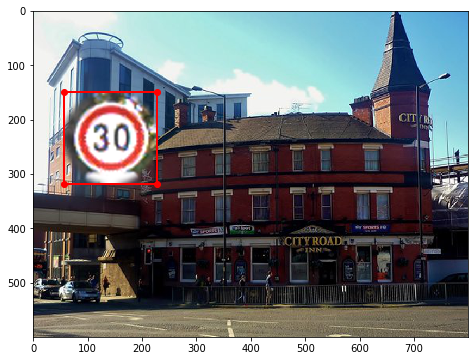

In [5]:
def plot(X,Y):
    plt.imshow(X)
    padding=0
    plt.scatter([Y[0],Y[2],Y[0],Y[2]],\
                [Y[1],Y[3],Y[3],Y[1]],c='red')
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((Y[0],Y[1]),Y[3]-Y[1],Y[2]-Y[0],linewidth=2,edgecolor='r',facecolor='none'))
    return plt
plot(x_train[0],y_train[0]).show()